In [1]:
import networkx as nx
import matplotlib.pyplot as plt

In [2]:
# generate the duplication divergence deletion model
def DDD_model(G0, m0, N, p, q, r):
    for source in range(m0, N+1):
        existing_nodes = [j for j in G0.nodes()]
        # choose target node uar
        target = random.choice(existing_nodes) 
        # all neighbours of target
        neighbours = [nbr for nbr in G0.neighbors(target)]
        # add the new node
        G0.add_node(source)
        # if duplication
        if random.random() <= q:
            if random.random() <= r:
                G0.add_edge(source, target)
            while len(neighbours)>0:
                nbr = neighbours.pop()
                if random.random() <= p:
                    G0.add_edge(source, nbr)
        else:
            while len(neighbours)>0:
                nbr = neighbours.pop()
                G0.remove_edge(target, nbr)
    return G0

/var/folders/d5/hs470kjx307fl2d9tq8h7xc80000gn/T/ipykernel_1338/1133471392.py:46: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, 2, i)


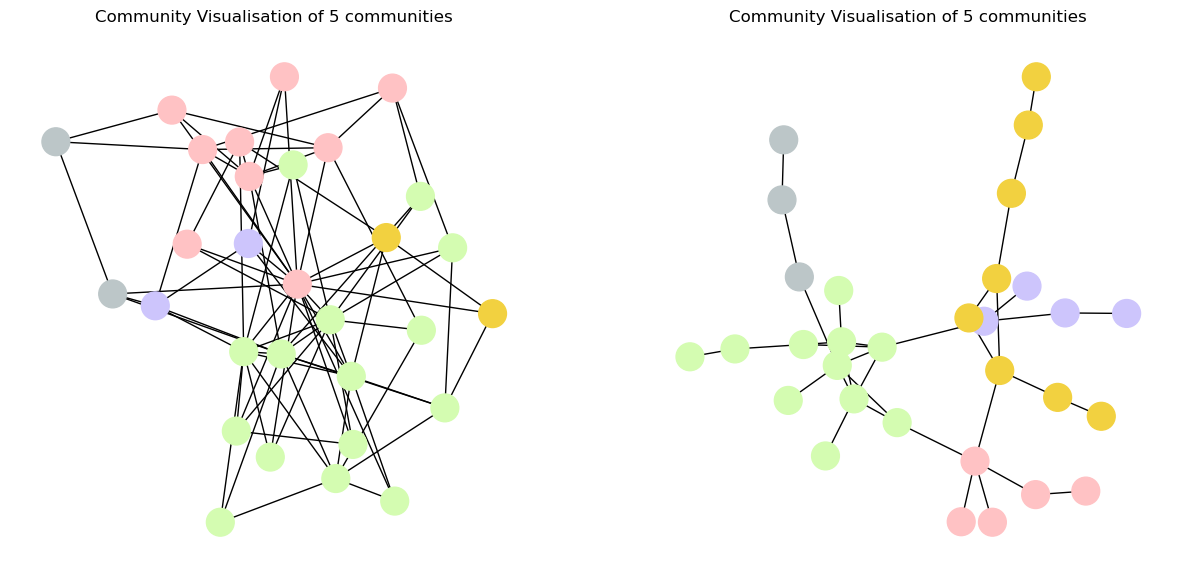

In [3]:
# import pandas as pd
import random
#import networkx as nx
import numpy as np

# Generate preferential attachment graph and find communities using Girvan-Newman
G1 = nx.barabasi_albert_graph(n=30, m=3)
communities1 = list(nx.community.girvan_newman(G1))

# Generate DDD graph and find communities using Girvan-Newman
G0 = nx.complete_graph(3)
G2 = DDD_model(G0, 3, 30, 0.1, 1, 1)
communities2 = list(nx.community.girvan_newman(G2))

# Modularity -> measures the strength of division of a network into modules
#modularity_df = pd.DataFrame(
 #   [
  #      [k + 1, nx.community.modularity(G, communities[k])]
       # for k in range(len(communities))
   # ],
    #columns=["k", "modularity"],
#)


# function to create node colour list
def create_community_node_colors(graph, communities):
    number_of_colors = len(communities[0])
    colors = ["#D4FCB1", "#CDC5FC", "#FFC2C4", "#F2D140", "#BCC6C8"][:number_of_colors]
    node_colors = []
    for node in graph:
        current_community_index = 0
        for community in communities:
            if node in community:
                node_colors.append(colors[current_community_index])
                break
            current_community_index += 1
    return node_colors


# function to plot graph with node colouring based on communities
def visualize_communities(graph, communities, i):
    node_colors = create_community_node_colors(graph, communities)
    modularity = round(nx.community.modularity(graph, communities), 6)
    title = f"Community Visualisation of {len(communities)} communities"
    pos = nx.spring_layout(graph, k=0.3, iterations=50, seed=2)
    plt.subplot(1, 2, i)
    plt.title(title)
    nx.draw(
        graph,
        pos=pos,
        node_size=400,
        node_color=node_colors,
        with_labels=False,
        font_size=20,
        font_color="black",
    )


fig, ax = plt.subplots(1, figsize=(15, 7))

# Plot graph with colouring based on communities
visualize_communities(G1, communities1[3], 1)
visualize_communities(G2, communities2[3], 2)

# Plot change in modularity as the important edges are removed
# modularity_df.plot.bar(
  #  x="k",
    # ax=ax[2],
   # color="#F2D140",
   # title="Modularity Trend for Girvan-Newman Community Detection",
#)
plt.savefig('pa_modularity.png')
plt.show()


<Figure size 640x480 with 0 Axes>